In [1]:
import sys, os
sys.path.append(r"C:\Users\elakkiya\json_tutorial\Chennai_Weather_Prediction")
import utils

## RIDGE REGRESSION

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
x_train, y_train, x_test, y_test = utils.load_data()
print(x_train.shape, 
      y_train.shape, x_test.shape, y_test.shape)

ridge_scaler = utils.load_scaler()
x_train_scaled = ridge_scaler.fit_transform(x_train.drop(columns=["date"], errors="ignore"))
x_test_scaled = ridge_scaler.transform(x_test.drop(columns=["date"], errors ="ignore"))

x_train_scaled_df = pd.DataFrame(x_train_scaled, 
                                 columns = x_train.drop(columns=["date"], errors = "ignore").columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, 
                                columns=x_test.drop(columns=["date"], errors ="ignore").columns)
print("Before:", y_train.shape)
print("Before:", y_test.shape)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print("After:", y_train.shape)
print("After: ", y_test.shape)

(3156, 18) (3156, 1) (789, 18) (789, 1)
Before: (3156, 1)
Before: (789, 1)
After: (3156,)
After:  (789,)


## MODEL CREATION AND SAVE

In [4]:
ridge_l2 = Ridge(alpha = 1.0, random_state = 42)
ridge_l2.fit(x_train_scaled_df, y_train)
utils.save_model(ridge_l2, "ridge_regression")

Model saved successfully in C:\Users\elakkiya\json_tutorial\Chennai_Weather_Prediction\models\ridge_regression.pkl


ridge_regression Model Evaluation starts...
predicting with ridge_regression...
Calculating Metrics...
Visualizing ridge_regression...


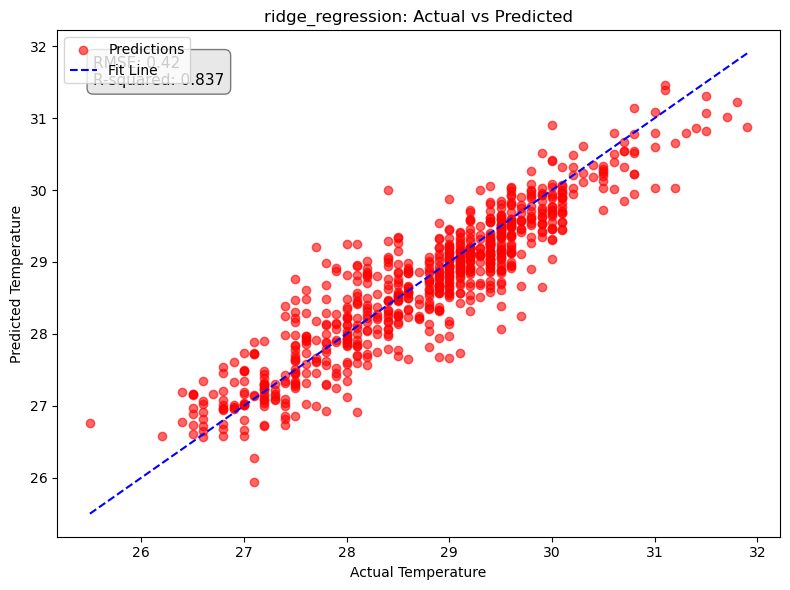

ridge_regression - Visualization - 1 done


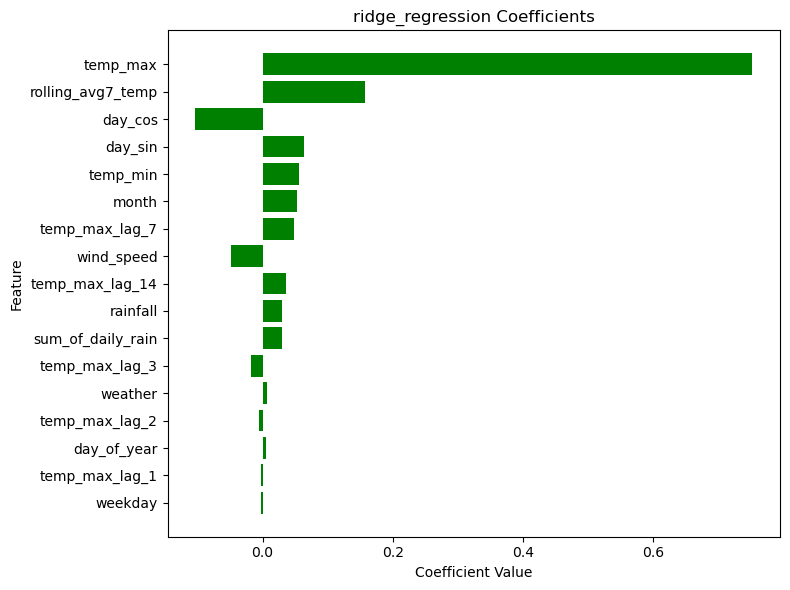

ridge_regression - Visualization -2 done
RMSE: 0.42379992613600165, 
r2 score:0.837


In [5]:
rmse, r2 = utils.evaluate_model(x_test_scaled_df, y_test, "ridge_regression")
print(f"RMSE: {rmse}, \nr2 score:{r2:.3f}")

## RIDGE CV REGRESSOR

In [6]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
alphas = np.logspace(-3,2, 50)
ridge_cv = RidgeCV(alphas = alphas, store_cv_values = True)
#ridge computes folds analytically
ridge_cv.fit(x_train_scaled_df, y_train)

#Getting the best alpha
print("Best alpha: " , ridge_cv.alpha_)

Best alpha:  7.543120063354623


the model found alpha 7.54 as the sweet spot that minimizes CV error, balancing bias and variance while improving model generalization

In [8]:
ridge_cv.alphas

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [9]:
#using the best alpha
ridge_modell2 = Ridge(alpha = ridge_cv.alpha_, random_state = 42)
ridge_modell2.fit(x_train_scaled_df, y_train)
utils.save_model(ridge_modell2, "ridgeCV")
#saving a Ridge Model trained with the alpha from RidgeCV.

Model saved successfully in C:\Users\elakkiya\json_tutorial\Chennai_Weather_Prediction\models\ridgeCV.pkl


## RIDGECV MODEL DIAGNOSTICS & REGULARIZATION DYNAMICS

### 1. ALPHA TUNING CURVE

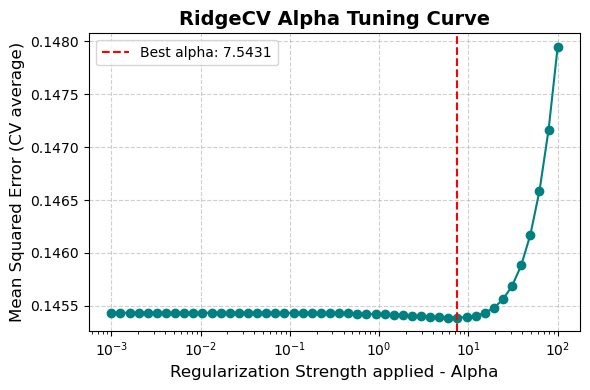

In [10]:
all_alphas =ridge_cv.alphas
mse_path = ridge_cv.cv_values_.mean(axis=0)
plt.figure(figsize=(6,4))
plt.plot(all_alphas, mse_path, marker='o', color="teal")
plt.axvline(ridge_cv.alpha_, color="red", linestyle="--", label = f"Best alpha: {ridge_cv.alpha_:.4f}")
plt.xscale("log")
plt.xlabel("Regularization Strength applied - Alpha", fontsize=12)
plt.ylabel("Mean Squared Error (CV average)", fontsize=12)
plt.title("RidgeCV Alpha Tuning Curve", fontsize=14, weight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 2. RIDGECV CROSS VALIDATION ERROR CURVE

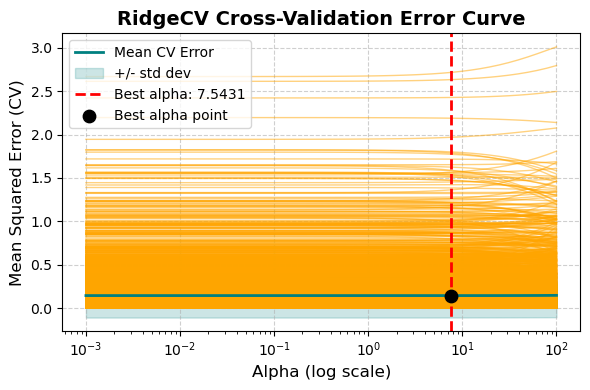

In [11]:
alphas = ridge_cv.alphas
cv_values = ridge_cv.cv_values_#(n_samples, nn_alphas)

mean_mse = np.mean(cv_values, axis=0)
std_mse = np.std(cv_values, axis=0)
best_alpha = ridge_cv.alpha_

plt.figure(figsize=(6,4))
#plotting mse path with cv values
plt.plot(alphas, cv_values.T, color = "orange", linewidth=1, alpha=0.5)

#plotting mean MSE with std error band
plt.plot(alphas, mean_mse, color="teal", linewidth=2, label="Mean CV Error")
#stability Indicator
plt.fill_between(alphas, 
                 mean_mse-std_mse, 
                 mean_mse+std_mse, 
                 color = "teal", 
                 alpha = 0.2, label="+/- std dev")

#marking the best alpha
plt.axvline(best_alpha, color="red", linestyle='--', linewidth=2,
            label=f"Best alpha: {best_alpha:.4f}")
plt.scatter(best_alpha, np.min(mean_mse), color="black", s=80, zorder = 5,
           label = "Best alpha point")

plt.xscale("log")
plt.xlabel("Alpha (log scale)", fontsize=12)
plt.ylabel("Mean Squared Error (CV)", fontsize=12)
plt.title("RidgeCV Cross-Validation Error Curve", fontsize=14, weight="bold")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 3. COEFFICIENT SHRINKAGE PATH
(REGULARIZATION PATH)

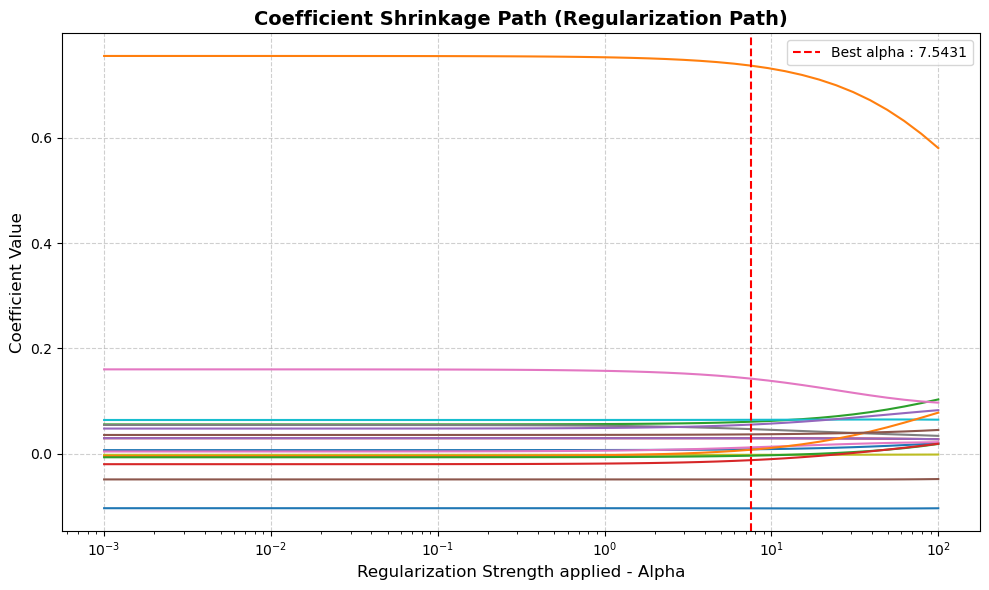

In [12]:
alphas=np.logspace(-3,2,50)
coefs = []#to store coefficients

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(x_train_scaled_df, y_train)
    coefs.append(ridge.coef_)
#list to array
coefs = np.array(coefs)

plt.figure(figsize=(10,6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Regularization Strength applied - Alpha", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Coefficient Shrinkage Path (Regularization Path)", fontsize=14, weight="bold")
plt.axvline(ridge_cv.alpha_, color = "red", linestyle="--", label=f"Best alpha : {ridge_cv.alpha_:.4f}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### ENHANCED COEFFICIENT SHRINKAGE PATH

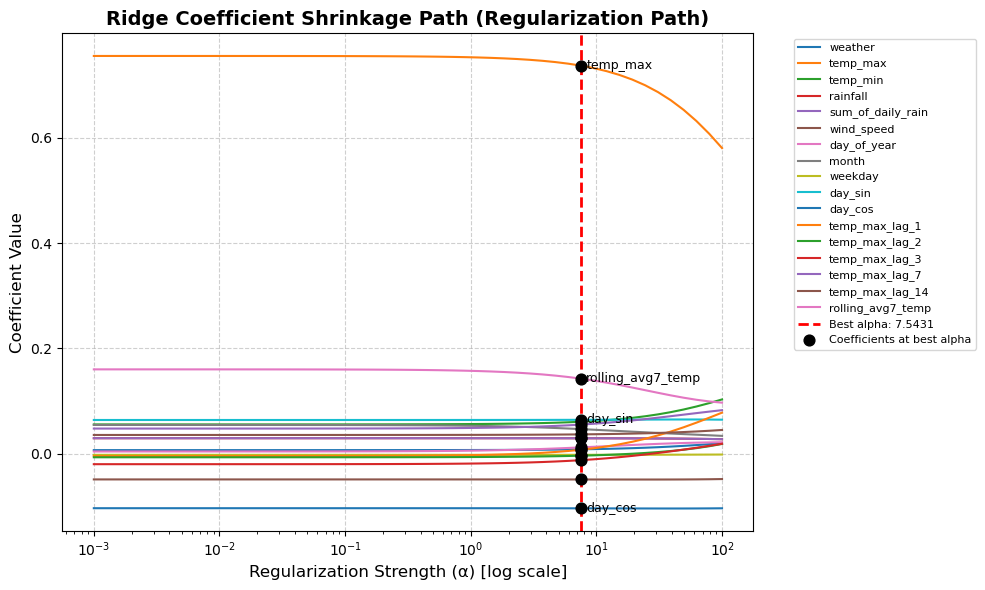

In [13]:
alphas = np.logspace(-3,2,50)
coefs=[]
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True, random_state = 42)
    ridge.fit(x_train_scaled_df, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)
plt.figure(figsize=(10,6))
#plotting the coeff path
#effort to visualize the features 
for i, feature in enumerate(x_train_scaled_df.columns):
    plt.plot(alphas , coefs[:,i], label=feature, lw=1.5)
    
#highlighting the best alpha
best_alpha = ridge_cv.alpha_
plt.axvline(best_alpha, color="red", linestyle="--", linewidth=2,
            label = f"Best alpha: {best_alpha:.4f}")
#mark coefficient values at the best alpha
best_alpha_index = np.argmin(np.abs(alphas - best_alpha))#finding the nearest alpha index from best alpha
best_coefs = coefs[best_alpha_index]
#scattering that coefficient values at the vertical best-alpha line
plt.scatter([best_alpha] * len(best_coefs), 
            best_coefs, 
            color="black", s=60, zorder=5,
            label="Coefficients at best alpha")

#we can also see the top 3 feature coefs at the best alpha 
top_id = np.argsort(np.abs(best_coefs))[-4:]
for t in top_id:
    plt.text(best_alpha* 1.1, 
             best_coefs[t],
             x_train_scaled_df.columns[t],
             fontsize=9, color="black", va="center")
             

plt.xscale("log")
plt.xlabel("Regularization Strength (α) [log scale]", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.title("Ridge Coefficient Shrinkage Path (Regularization Path)", fontsize=14, weight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
best_coefs

array([ 0.00835175,  0.73706285,  0.06073334,  0.02930805,  0.02930805,
       -0.04895759,  0.01199688,  0.04671331, -0.00212049,  0.0643585 ,
       -0.10375212,  0.00752053, -0.00376254, -0.01226231,  0.05528926,
        0.03671139,  0.14255806])

### 4. FEATURE IMPORTANCE BAR PLOT

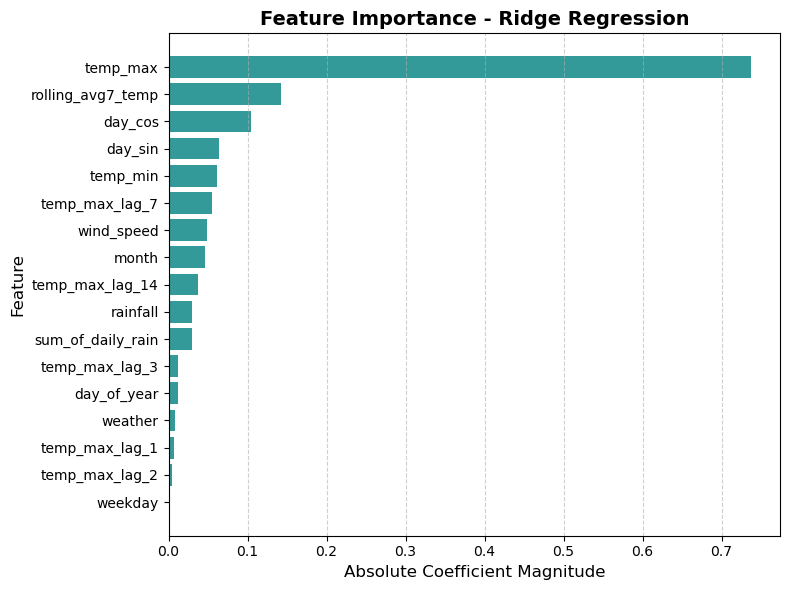

In [15]:
feature_names = x_train_scaled_df.columns
coefficients = ridge_cv.coef_

coef_df = pd.DataFrame({"Feature" : feature_names,
                       "Coefficient" : coefficients,
                        "Abs_Coefficient" : np.abs(coefficients)})

#sorting by their absolute value importance
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=True)

#a bar for every feature with abs coef
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df["Abs_Coefficient"], color="teal", alpha=0.8)
plt.xlabel("Absolute Coefficient Magnitude", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance - Ridge Regression", fontsize=14, weight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## MODEL EVALUATION AND MODEL METRICS

ridgeCV Model Evaluation starts...
predicting with ridgeCV...
Calculating Metrics...
Visualizing ridgeCV...


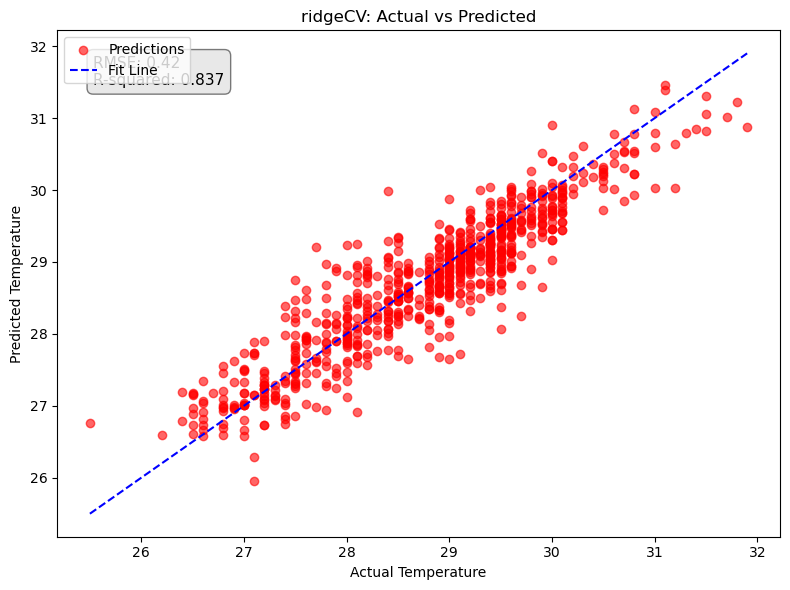

ridgeCV - Visualization - 1 done


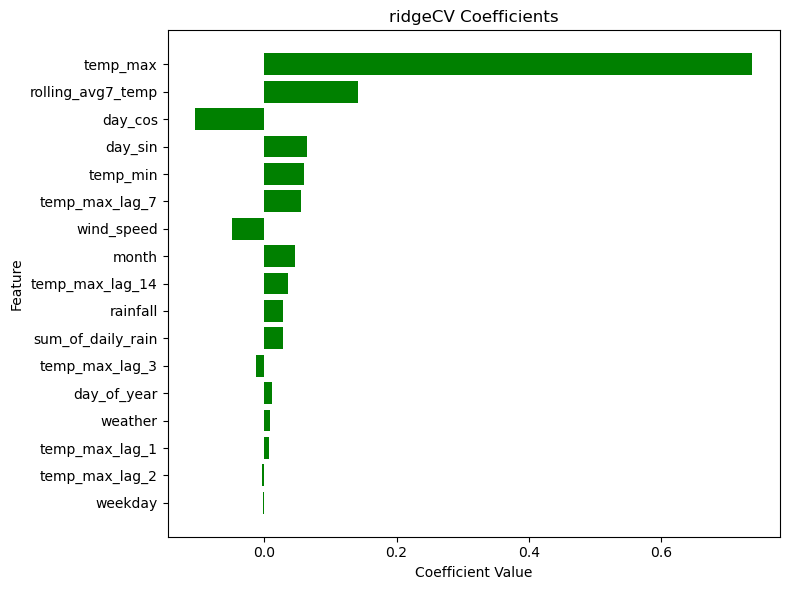

ridgeCV - Visualization -2 done
RMSE: 0.42384935313883554, 
r2 score:0.837


In [16]:
rmse, r2 = utils.evaluate_model(x_test_scaled_df, y_test, "ridgeCV")
print(f"RMSE: {rmse}, \nr2 score:{r2:.3f}")

The viz 2 displacys the Ridge CV coefficients.

x-axis coefficients:

+ve - direct(increasing) relationship with our target max_temp

-ve - inverse(decreasing) relationship with our target


## FORECAST

In [17]:
forecast_results = utils.forecast_next_3_days("ridgeCV", x_test_scaled_df, 3)
print(forecast_results)

Last Date:  2025-11-03 21:45:40.211617
Next Day:  2025-11-04 21:45:40.211617
Next Day:  2025-11-05 21:45:40.211617
Next Day:  2025-11-06 21:45:40.211617
         date  predicted_temp
0  2025-11-04           28.84
1  2025-11-05           29.06
2  2025-11-06           28.98


In [18]:
forecast_results1 = utils.forecast_next_3_days("ridge_regression", x_test_scaled_df, 3)
print(forecast_results1)

Last Date:  2025-11-03 21:45:40.252666
Next Day:  2025-11-04 21:45:40.252666
Next Day:  2025-11-05 21:45:40.252666
Next Day:  2025-11-06 21:45:40.252666
         date  predicted_temp
0  2025-11-04           28.84
1  2025-11-05           28.77
2  2025-11-06           28.61
